# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df_og = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df_og.shape)
df_og.sample(5)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
197,877159,M,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.057780,0.1770,0.05340,0.6362,1.3050,4.312,76.360,0.005530,0.05296,0.06110,0.014440,0.02140,0.005036,19.760,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558,NaN
430,907914,M,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.097110,0.2041,0.06898,0.2530,0.8749,3.466,24.190,0.006965,0.06213,0.07926,0.022340,0.01499,0.005784,16.350,27.57,125.40,832.7,0.14190,0.7090,0.9019,0.24750,0.2866,0.11550,NaN
544,922297,B,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.023690,0.1620,0.06688,0.2720,1.0470,2.076,23.120,0.006298,0.02172,0.02615,0.009061,0.01490,0.003599,15.050,24.75,99.17,688.6,0.12640,0.2037,0.1377,0.06845,0.2249,0.08492,NaN
272,8910988,M,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.108800,0.1721,0.06194,1.1670,1.3520,8.867,156.800,0.005687,0.04960,0.06329,0.015610,0.01924,0.004614,28.190,28.18,195.90,2384.0,0.12720,0.4725,0.5807,0.18410,0.2833,0.08858,NaN
412,905539,B,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,0.1186,1.1820,1.174,6.802,0.005515,0.02674,0.03735,0.005128,0.01951,0.004583,9.965,27.99,66.61,301.0,0.10860,0.1887,0.1868,0.02564,0.2376,0.09206,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [224]:
df = df_og.drop(['diagnosis', 'Unnamed: 32'], axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


### Let's do only 2 right now, using 'radius_mean' and 'compactness_mean'

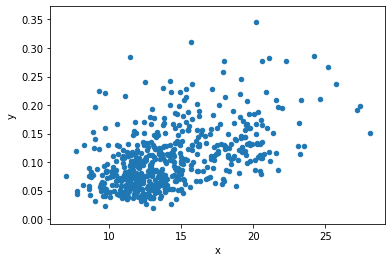

In [225]:
# Perform K-Means Clustering on the Dataset
x = df['radius_mean']
y = df['compactness_mean']

df_1 = pd.DataFrame({'x': x, 'y': y})
df_1.plot.scatter('x', 'y');

In [0]:
import math
import numpy as np
from scipy.spatial import distance

def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = distance.cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)

def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
#centroids = df_1.sample(2)
#find_nearest_centroid(df_1, centroids).head()

In [227]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_1)
labels = kmeans.labels_

print(labels)

[1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 1 

In [228]:
new_series = pd.Series(labels)
df_1['clusters'] = new_series.values

df_1.head()

,x,y,clusters
0,17.99,0.27760,1
1,20.57,0.07864,1
2,19.69,0.15990,1
3,11.42,0.28390,0
4,20.29,0.13280,1


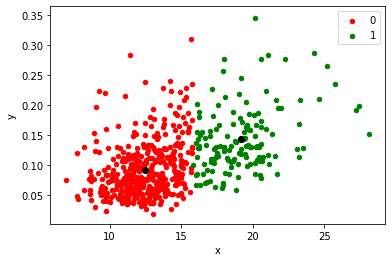

In [229]:
centroids = get_centroids(df_1, 'clusters')
plot_clusters(df_1, 'clusters', centroids)

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [230]:
# Your Code Here
df_1['diagnosis'] = df_og['diagnosis']
df_1.sample(10)
#shows us that KMeans have classified malignant tumors (M) as 1 and 
#benign (B) tumors as 0
#some tumors may be misclassified 

,x,y,clusters,diagnosis
443,10.57,0.04462,0,B
82,25.22,0.26650,1,M
198,19.18,0.14280,1,M
256,19.55,0.20630,1,M
62,14.25,0.20080,0,M
395,14.06,0.05361,0,B
458,13.00,0.05073,0,B
147,14.95,0.11670,0,B
304,11.46,0.07694,0,B
435,13.98,0.11330,0,M


In [0]:
df_1['clusters'] = df_1['clusters'].replace({1: 'M', 0: 'B'})

In [232]:
df_1

,x,y,clusters,diagnosis
0,17.99,0.27760,M,M
1,20.57,0.07864,M,M
2,19.69,0.15990,M,M
3,11.42,0.28390,B,M
4,20.29,0.13280,M,M
...,...,...,...,...
564,21.56,0.11590,M,M
565,20.13,0.10340,M,M
566,16.60,0.10230,M,M
567,20.60,0.27700,M,M


In [233]:
def accuracy_score(df):
  num_correct = len(df[df['clusters'] == df['diagnosis']])
  return f"Accuracy Score: {num_correct/len(df)}"

accuracy_score(df_1)
#could be better, might want to consider using different features...

'Accuracy Score: 0.8558875219683656'

### Using entire Dataframe

In [234]:
df_all = df.copy()
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_all)
labels_all = kmeans.labels_

print(labels_all)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [235]:
new_series = pd.Series(labels_all)
df_all['clusters'] = new_series.values

df_all.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [236]:
df_all['diagnosis'] = df_og['diagnosis']
df_all[['clusters', 'diagnosis']].sample(10)

,clusters,diagnosis
150,1,B
550,0,B
523,0,B
394,0,B
461,1,M
274,0,M
400,0,M
124,0,B
495,0,B
415,0,B


In [0]:
df_all['clusters'] = df_all['clusters'].replace({0: 'M', 1: 'B'})

In [238]:
def accuracy_score(df):
  num_correct = len(df[df['clusters'] == df['diagnosis']])
  return f"Accuracy Score: {num_correct/len(df)}"

accuracy_score(df_all)
#Using all variables of the dataframe for KMeans does not produce very accurate results

'Accuracy Score: 0.37434094903339193'

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



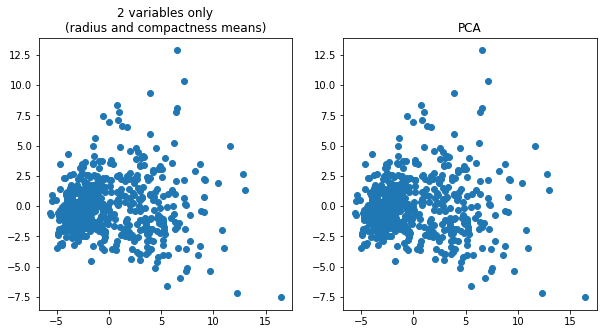

In [295]:
##### Your Code Here #####
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_processed = df_og.drop('Unnamed: 32', axis=1)
df_processed['diagnosis'] = df_processed['diagnosis'].replace({'M': 0, 'B': 1})

scaler = StandardScaler()
df_processed = scaler.fit_transform(df_processed)

pca = PCA(2)
pca_features = pca.fit_transform(df_processed)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y)
ax2.scatter(pca_features.T[0], pca_features.T[1])
ax1.set_title('2 variables only\n(radius and compactness means)')
ax2.set_title('PCA');
#they're kinda similar

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
x = pca_features.T[0]
y = pca_features.T[1]

df_pca = pd.DataFrame({'x': x, 'y': y})

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_pca)
labels = kmeans.labels_

In [280]:
new_series = pd.Series(labels)
df_pca['clusters'] = new_series.values
df_pca['diagnosis'] = df_og['diagnosis']
df_pca.sample(10)

,x,y,clusters,diagnosis
358,-3.129368,1.617641,0,B
278,-3.547250,-2.664202,0,B
447,-1.672691,-1.020856,0,B
401,-3.508874,-1.024742,0,B
361,-2.581853,-1.194943,0,B
121,3.541937,-1.306233,1,M
460,3.852289,-1.894409,1,M
312,-2.250032,-0.015570,0,B
140,-5.075721,0.490221,0,B
89,1.036878,1.126140,0,B


In [0]:
df_pca['clusters'] = df_pca['clusters'].replace({0: 'B', 1: 'M'})
#this time it might be that 0 maps to B and M maps to 1

In [282]:
accuracy_score(df_pca)

'Accuracy Score: 0.9279437609841827'

### It's even better than the first run with only radius means and compactness means! 

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project

In [0]:
df_processed = df_og.drop('Unnamed: 32', axis=1)
df_processed['diagnosis'] = df_processed['diagnosis'].replace({'M': 0, 'B': 1})

scaler = StandardScaler()
df_processed = scaler.fit_transform(df_processed)

pca = PCA(5)
pca_features = pca.fit_transform(df_processed)

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_features)
labels = kmeans.labels_

In [0]:
df_5pca = pd.DataFrame(pca_features)
df_5pca['clusters'] = pd.Series(labels)
df_5pca['diagnosis'] = df_og['diagnosis']

In [0]:
df_5pca #1:M, 0:B
df_5pca['clusters'] = df_5pca['clusters'].replace({1: 'M', 0: 'B'})

In [311]:
accuracy_score(df_5pca)

'Accuracy Score: 0.929701230228471'

In [0]:
df_processed = df_og.drop('Unnamed: 32', axis=1)
df_processed['diagnosis'] = df_processed['diagnosis'].replace({'M': 0, 'B': 1})

scaler = StandardScaler()
df_processed = scaler.fit_transform(df_processed)

pca = PCA(10)
pca_features = pca.fit_transform(df_processed)

kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_features)
labels = kmeans.labels_

df_10pca = pd.DataFrame(pca_features)
df_10pca['clusters'] = pd.Series(labels)
df_10pca['diagnosis'] = df_og['diagnosis']

In [0]:
df_10pca
df_10pca['clusters'] = df_10pca['clusters'].replace({1: 'M', 0: 'B'})


In [318]:
accuracy_score(df_10pca)

'Accuracy Score: 0.929701230228471'